## Agenda

* Intro (10 min)
  * What is Theano and why should I care?
  * Installation
  * Configuration
* Basics (30 min)
  * Baby steps
  * Theano variables and functions
  * Shared variables and more on functions
  * Debugging
* Theano for Machine Learning (50 min)
  * Logistic regression
  * SVM
  * Kernels
  * Regularization
* Lasagne (?? min)
  * MLP
  * Convolutional neural network
  * Goodies (?)


The code is here: https://github.com/dudevil/datafest-theano-tutorial/.

### Intro

<img src="pics/probably_theano.png">

The project was started back in 2007 at the University of Montreal

Theano is a Python library that allows you to define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays efficiently. 

But it's also much more than that:

* Language for symbolic computation
* Optimizing compiler
* Python library

### Installation

Dependencies:
     
   * System: **g++, BLAS**
   * Python: **NumPy, SciPy** 
   * Goodies: **CUDA, CuDNN**


Current release:
```
pip install Theano
```

Bleeding-edge:
```
pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git
```

[Official instructions](http://deeplearning.net/software/theano/install.html#install)

### Configuration

~/.theanorc

```
    [global]
    device = gpu # cpu
    floatX = float32
    optimizer_including=cudnn 
    allow_gc = False # быстрее но использует больше памяти
    #exception_verbosity=high
    #optimizer = None  # полезно при отладке
    #profile = True
    #profile_memory = True

    [nvcc]
    fastmath = True
```

[More on configuration](http://deeplearning.net/software/theano/library/config.html)

### Getting help

Theano has great documentation:
   * http://deeplearning.net/software/theano/tutorial/
   * http://deeplearning.net/software/theano/index.html#documentation
   
Code samples:
   * http://deeplearning.net/tutorial/
   
And user community:
   * https://groups.google.com/forum/#!forum/theano-users

Don't be afraid to peek into the code:
   * https://github.com/Theano/Theano

## Basic operations

### Baby steps

In [1]:
import theano 
import theano.tensor as T
from nolearn.lasagne.visualize import draw_to_notebook
from __future__ import print_function

%pylab inline

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Quadro P6000 (CNMeM is disabled, cuDNN 5105)
/home/dudevil/.virtualenvs/theano-tut/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
# doing stuff with theano

# declare theano variable
a = T.lscalar() 

# construct an expression
expression = 1 + 2 * a + a ** 2 

# compile a theano function
f = theano.function(
    inputs=[a],        # input
    outputs=expression  # output
)

# evaluate the expression
f(10)

array(121)

### Theano variables and functions

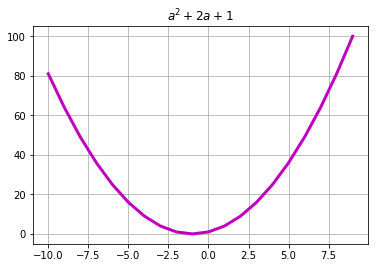

In [3]:
# only the declaration changes
a = T.lvector()

expression = 1 + 2 * a + a ** 2 

f = theano.function(
    inputs=[a],        # input
    outputs=expression  # output
)

arg = arange(-10, 10)
res = f(arg)

plot(arg, res, c='m', linewidth=3.)
grid()
title("$a^2 + 2a + 1$")

In [4]:
# can do the same with matrices
x = T.dmatrix('x')
y = T.dmatrix('y')

z = x + 2 * y

f = theano.function([x, y], z)
f(ones((3, 3)), eye(3))

array([[ 3.,  1.,  1.],
       [ 1.,  3.,  1.],
       [ 1.,  1.,  3.]])

In [5]:
# broadcasting also works
x = T.dmatrix('x')
v = T.dvector('v')

z = v + x

f = theano.function([x, v], z)
f(ones((3, 4)), ones((4,)))

array([[ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.]])

In [6]:
# types should be handled with care
x = T.fmatrix('x')
v = T.fvector('v')

z = v + x

f = theano.function([x, v], z)
print(f(ones((3, 4), dtype=float32), np.ones((4,), dtype=float32)))
print(f(ones((3, 4)), ones((4,))))

[[ 2.  2.  2.  2.]
 [ 2.  2.  2.  2.]
 [ 2.  2.  2.  2.]]


TypeError: Bad input argument to theano function with name "<ipython-input-6-ed57f9fdfbb6>:7" at index 0 (0-based).  
Backtrace when that variable is created:

  File "/home/dudevil/.virtualenvs/theano-tut/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/dudevil/.virtualenvs/theano-tut/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/dudevil/.virtualenvs/theano-tut/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/dudevil/.virtualenvs/theano-tut/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/dudevil/.virtualenvs/theano-tut/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/dudevil/.virtualenvs/theano-tut/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/dudevil/.virtualenvs/theano-tut/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-ed57f9fdfbb6>", line 2, in <module>
    x = T.fmatrix('x')
TensorType(float32, matrix) cannot store a value of dtype float64 without risking loss of precision. If you do not mind this loss, you can: 1) explicitly cast your data to float32, or 2) set "allow_input_downcast=True" when calling "function". Value: "array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])"

In [7]:
# or you can supress the exception
x = T.fmatrix('x')
v = T.fvector('v')

z = v + x

f = theano.function(
    inputs=[x, v],
    outputs=z,
    allow_input_downcast=True
)
print(f(ones((3, 4), dtype=float64), ones((4,), dtype=float64)))

[[ 2.  2.  2.  2.]
 [ 2.  2.  2.  2.]
 [ 2.  2.  2.  2.]]


### Shared variables and more on functions

In [8]:
# shared variables represent internal state
state = theano.shared(0)

i = T.iscalar('i')
inc = theano.function([i],
                      state,
                      # updates the shared variable value
                      updates=[(state, state+i)]) 
dec = theano.function([i],
                      state,
                      updates=[(state, state-i)])

# more than one function can update the shared variable
print(state.get_value())
inc(1)
inc(1)
inc(1)
print(state.get_value())
dec(2)
print(state.get_value())

0
3
1


In [9]:
# we can also set the shared variable outside of the function
state.set_value(-15)
print(state.get_value())

-15


In [10]:
# shared variables can in be inserted into the compurational graph
x = T.lscalar('x')
y = T.lscalar('y')
i = T.lscalar('i')

expression = (x - y) ** 2

state = theano.shared(0)

f = theano.function(
    inputs=[x, i],
    outputs=expression,
    updates=[(state, state+i)],
    # use the value at state as y
    givens={
        y : state
    }
)
print(f(5, 1)) # (5 - 0) ^ 2 = 25
print(f(2, 1)) # (2 - 1) ^ 2 = 1

25
1


In [11]:
# we can compute different outputs simultaneously
x = T.lscalar('x')
y = T.lscalar('y')

square = T.square(x + y)
sqrt = T.sqrt(x + y)

f = theano.function(
    inputs=[x, y],
    outputs=[square, sqrt]
)
print(f(5, 4))
print(f(2, 2))

[array(81), array(3.0)]
[array(16), array(2.0)]


## Debugging

## Printing graphs

In [12]:
x = T.lscalar('x')
y = T.lscalar('y')

square = T.square(x + y)
sqrt = T.sqrt(x + y)

f = theano.function(
    inputs=[x, y],
    outputs=[square, sqrt]
)
# the sum get's computed only once
theano.printing.debugprint(f)

Elemwise{Sqr}[(0, 0)] [id A] ''   2
 |Elemwise{add,no_inplace} [id B] ''   0
   |x [id C]
   |y [id D]
Elemwise{sqrt,no_inplace} [id E] ''   1
 |Elemwise{add,no_inplace} [id B] ''   0


In [13]:
# define a theano expression
W = T.fmatrix('W')
b = T.fvector('b')
X = T.fmatrix('X')

expr = T.dot(X, W) + b
prob = 1 / (1 + T.exp(-expr))
pred = prob > 0.5
# and print it
theano.pprint(pred)

'gt((TensorConstant{1} / (TensorConstant{1} + exp((-((X \\dot W) + b))))), TensorConstant{0.5})'

In [14]:
theano.printing.debugprint(pred)

Elemwise{gt,no_inplace} [id A] ''   
 |Elemwise{true_div,no_inplace} [id B] ''   
 | |InplaceDimShuffle{x,x} [id C] ''   
 | | |TensorConstant{1} [id D]
 | |Elemwise{add,no_inplace} [id E] ''   
 |   |InplaceDimShuffle{x,x} [id F] ''   
 |   | |TensorConstant{1} [id D]
 |   |Elemwise{exp,no_inplace} [id G] ''   
 |     |Elemwise{neg,no_inplace} [id H] ''   
 |       |Elemwise{add,no_inplace} [id I] ''   
 |         |dot [id J] ''   
 |         | |X [id K]
 |         | |W [id L]
 |         |InplaceDimShuffle{x,0} [id M] ''   
 |           |b [id N]
 |InplaceDimShuffle{x,x} [id O] ''   
   |TensorConstant{0.5} [id P]


In [15]:
theano.printing.pydotprint(pred, outfile='pics/pred_graph.png', var_with_name_simple=True)  

The output file is available at pics/pred_graph.png


<img src="pics/pred_graph.png">

In [16]:
# define a theano expression
W_1 = T.fmatrix('W_1')
W_2 = T.fmatrix('W_2')
b_1 = T.fvector('b_1')
b_2 = T.fvector('b_2')
activation = lambda expr: 1 / (1 + T.exp(-expr))
X = T.fmatrix('X')
y = T.ivector('y')

d1 = T.dot(X, W_1) + b_1
a1 = activation(d1)
d2 = T.dot(a1, W_2) + b_2
prob = activation(d2)
loss = T.nnet.categorical_crossentropy(prob, y)

theano.printing.pydotprint(loss, outfile='pics/pred_biggraph.png', var_with_name_simple=True)  

The output file is available at pics/pred_biggraph.png


<img src="pics/pred_biggraph.png">
<img src="pics/escalated_quickly.jpeg">

More on graph visualizations: http://deeplearning.net/software/theano/tutorial/printing_drawing.html

### MonitorMode for debugging

In [17]:
def inspect_inputs(i, node, fn):
    print(i, node, "input(s) value(s):", [input[0] for input in fn.inputs])

def inspect_outputs(i, node, fn):
    print("output(s) value(s):", [output[0] for output in fn.outputs])

x = theano.tensor.dscalar('x')
f = theano.function(inputs=[x], 
                    outputs=(5 * x),
                    mode=theano.compile.MonitorMode(
                        pre_func=inspect_inputs,
                        post_func=inspect_outputs))
f(3)

0 Elemwise{mul,no_inplace}(TensorConstant{5.0}, x) input(s) value(s): [array(5.0), array(3.0)]
output(s) value(s): [array(15.0)]


array(15.0)

More debugging technics are available here: http://deeplearning.net/software/theano/tutorial/debug_faq.html

## Theano for Machine learining

#### Preparting data

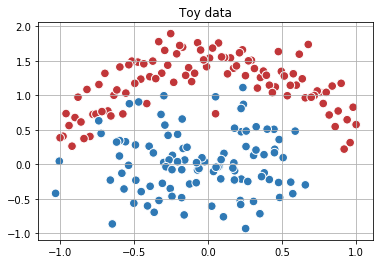

In [18]:
x1 = linspace(-1, 1, 100)
x2 = 1.5 - x1 ** 2 + random.normal(scale=0.2, size=100)
x3 = random.normal(scale=0.4, size=100)
x4 = random.normal(scale=0.4, size=100)

permutation = random.permutation(np.arange(200))
x = hstack((
    vstack((x1, x2)),
    vstack((x3, x4)))).T[permutation]
y = concatenate((
    zeros_like(x1),
    ones_like(x3)))[permutation]

# needed for pictures later
xx, yy = mgrid[-2:2:.01, -2:2:.01]
grid_arr = c_[xx.ravel(), yy.ravel()]

def plot_decision(predicts):
    probas = predicts.reshape(xx.shape)

    contour = contourf(xx, yy, probas, 25, cmap="RdBu", vmin=0, vmax=1)
    colorbar(contour)

    scatter(x[:,0], x[:, 1], c=y, s=50,
                cmap="RdBu", vmin=-.2, vmax=1.2,
                edgecolor="white", linewidth=1)
    title("Some cool decision boundary")
    grid()
    
    
scatter(x[:,0], x[:, 1], c=y, s=75,
            cmap="RdBu", vmin=-.2, vmax=1.2,
            edgecolor="white", linewidth=1)
title("Toy data")
grid()

In [19]:
def plot_optimizers(weights_path1, weights_path2, b=0.):
    w1 = np.arange(1, -10, -0.1)
    w2 = np.arange(-1.5, 1.5, 0.1)
    X, Y = np.meshgrid(w2, w1)

    param_grid = np.dstack((X[..., np.newaxis], Y[..., np.newaxis]))
    grid_dot = np.dot(param_grid, x.T) + b
    grid_sigm = 1 / (1 + np.exp(-grid_dot))
    grid_ce = np.mean(- y * np.log(grid_sigm) - (1 - y) * np.log(1 - grid_sigm), axis=2)

    cnt = contour(X, Y, grid_ce, 20, levels=[0.17, 0.2, 0.25, 0.3, 0.4, 0.6, 0.8, 1.2, 1.5, 2.])
    clabel(cnt, inline=1, fontsize=10)

    plot(weights_path1[:, 0], weights_path1[:, 1], marker='*', label='Gradient descent')
    plot(weights_path2[:, 0], weights_path2[:, 1], marker='+', label="Newton's method")
    legend(loc='best')
    title("Gradient descent vs Newton's method")
    
def plot_learning_curves(train_loss, valid_loss, val_acc):
    x = range(1,101)
    f, ax1 = subplots()
    tline = ax1.plot(x, train_loss, linewidth=2., label='Train loss')
    vline = ax1.plot(x, valid_loss, c='m', linewidth=2., label='Validation loss')
    ax1.grid()
    ax2 = twinx()
    aline = ax2.plot(x, valid_acc, c='g', linewidth=2., label='Validation accuracy')

    lns = tline + vline + aline
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=2)
    title("Learning curves MLP")

### Logistic regression

In [20]:
# allocate parameters
W = theano.shared(
    value=numpy.zeros((2, 1),dtype=theano.config.floatX), 
    name='W',  
    borrow=True)

b = theano.shared(
    value=numpy.zeros((1,), dtype=theano.config.floatX),
    name='b',
    borrow=True)

# and define symbolic variables
X = T.matrix('X')
Y = T.imatrix('Y')

# define model
linear = T.dot(X, W) + b
p_y_given_x = T.nnet.sigmoid(linear)
y_pred = p_y_given_x > 0.5

# define loss-function
loss = T.nnet.binary_crossentropy(p_y_given_x, Y).mean()

# compute the gradients
g_W = T.grad(loss, W)
g_b = T.grad(loss, b)

# define parametes updates
updates = [(W, W - 0.04 * g_W),
           (b, b - 0.08 * g_b)]

# compile functions
train = theano.function(
    inputs=[X, Y],
    outputs=loss,
    updates=updates,
    allow_input_downcast=True
)

predict_proba = theano.function(
    [X],
    p_y_given_x,
    allow_input_downcast=True
)

In [21]:
sgd_weights = [W.get_value().flatten()]
for iter_ in range(4001):
    loss = train(x, y[:, np.newaxis])
    sgd_weights.append(W.get_value().flatten())
    if iter_ % 100 == 0:
        print("[Iteration {:04d}] Train loss: {:.4f}".format(iter_, float(loss)))

[Iteration 0000] Train loss: 0.6931
[Iteration 0100] Train loss: 0.5019
[Iteration 0200] Train loss: 0.4158
[Iteration 0300] Train loss: 0.3679
[Iteration 0400] Train loss: 0.3380
[Iteration 0500] Train loss: 0.3179
[Iteration 0600] Train loss: 0.3035
[Iteration 0700] Train loss: 0.2927
[Iteration 0800] Train loss: 0.2844
[Iteration 0900] Train loss: 0.2779
[Iteration 1000] Train loss: 0.2726
[Iteration 1100] Train loss: 0.2683
[Iteration 1200] Train loss: 0.2646
[Iteration 1300] Train loss: 0.2616
[Iteration 1400] Train loss: 0.2590
[Iteration 1500] Train loss: 0.2568
[Iteration 1600] Train loss: 0.2548
[Iteration 1700] Train loss: 0.2532
[Iteration 1800] Train loss: 0.2517
[Iteration 1900] Train loss: 0.2504
[Iteration 2000] Train loss: 0.2493
[Iteration 2100] Train loss: 0.2482
[Iteration 2200] Train loss: 0.2473
[Iteration 2300] Train loss: 0.2465
[Iteration 2400] Train loss: 0.2458
[Iteration 2500] Train loss: 0.2451
[Iteration 2600] Train loss: 0.2445
[Iteration 2700] Train loss:

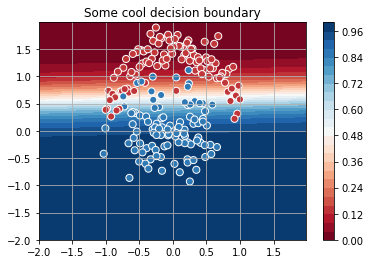

In [22]:
probas = predict_proba(grid_arr)
plot_decision(probas)

In [23]:
# allocate parameters
W_init = numpy.zeros((2,),dtype=theano.config.floatX)
W_flat = theano.shared(W_init, name='W')
W = W_flat.reshape((2, 1))

b_init = numpy.zeros((1,), dtype=theano.config.floatX)
b_flat = theano.shared(b_init, name='b')
b = b_flat.reshape((1,))

# and define symbolic variables
X = T.matrix('X')
Y = T.imatrix('Y')

# define model
linear = T.dot(X, W) + b
p_y_given_x = T.nnet.sigmoid(linear)
y_pred = p_y_given_x > 0.5

# define loss-function
loss = T.nnet.binary_crossentropy(p_y_given_x, Y).mean()

# compute the gradients
g_W = T.grad(loss, W_flat)
g_b = T.grad(loss, b_flat)

h_W = T.nlinalg.matrix_inverse(T.hessian(loss, wrt=W_flat))
h_b = T.nlinalg.matrix_inverse(T.hessian(loss, wrt=b_flat))

# define parametes updates
updates_newton = [(W_flat, W_flat -  T.dot(h_W , g_W)),
           (b_flat, b_flat - T.dot(h_b, g_b))]

# # compile functions
train_newton = theano.function(
    inputs=[X, Y],
    outputs=loss,
    updates=updates_newton,
    allow_input_downcast=True
)

predict_proba = theano.function(
    [X],
    p_y_given_x,
    allow_input_downcast=True
)

In [24]:
newton_weights = [W_flat.get_value()]
for iter_ in range(31):
    loss = train_newton(x, y[:, np.newaxis])
    newton_weights.append(W_flat.get_value())
    if iter_ % 5 == 0:
        print("[Iteration {:04d}] Train loss: {:.4f}".format(iter_, float(loss)))

[Iteration 0000] Train loss: 0.6931
[Iteration 0005] Train loss: 0.2727
[Iteration 0010] Train loss: 0.2441
[Iteration 0015] Train loss: 0.2391
[Iteration 0020] Train loss: 0.2380
[Iteration 0025] Train loss: 0.2377
[Iteration 0030] Train loss: 0.2377


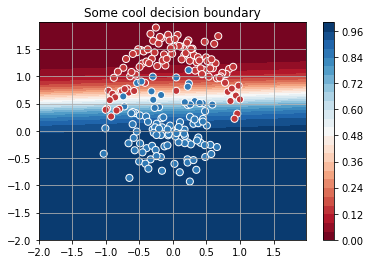

In [25]:
probas = predict_proba(grid_arr)
plot_decision(probas)

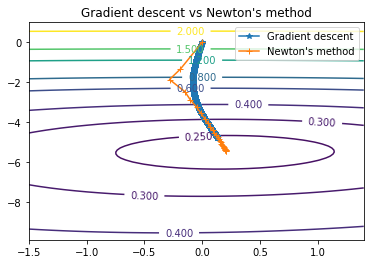

In [26]:
# the data in this notebook is generated randomly and the isolines were adapted for a certain value
# so this plot might not always look nice
plot_optimizers(np.array(sgd_weights), np.array(newton_weights), b=b_flat.get_value())

### SVM

In [27]:
# reset parameters
W = theano.shared(
    value=numpy.zeros((2, 1),dtype=theano.config.floatX), 
    name='W',  
    borrow=True)

b = theano.shared(
    value=numpy.zeros((1,), dtype=theano.config.floatX),
    name='b',
    borrow=True)

# and define symbolic variables
X = T.matrix('X')
Y = T.imatrix('Y')
C = 10.

# define model
linear = T.dot(X, W) + b

# We only need to change the loss function
loss = C * T.maximum(0, 1 - linear * (Y * 2 - 1)).mean() + T.square(W).sum()

# compute the gradients
g_W = T.grad(loss, W)
g_b = T.grad(loss, b)

# define parametes updates
updates = [(W, W - 0.04 * g_W),
           (b, b - 0.08 * g_b)]

# compile functions
train = theano.function(
    inputs=[X, Y],
    outputs=loss,
    updates=updates,
    allow_input_downcast=True
)
               
predict = theano.function(
    [X],
    linear > 0,
    allow_input_downcast=True
)

In [28]:
for iter_ in range(50):
    loss = train(x, y[:, np.newaxis])
    if iter_ % 10 == 0:
        print("[Iteration {:04d}] Train loss: {:.4f}".format(iter_, float(loss)))


[Iteration 0000] Train loss: 10.0000
[Iteration 0010] Train loss: 5.4058
[Iteration 0020] Train loss: 5.3153
[Iteration 0030] Train loss: 5.3152
[Iteration 0040] Train loss: 5.3148


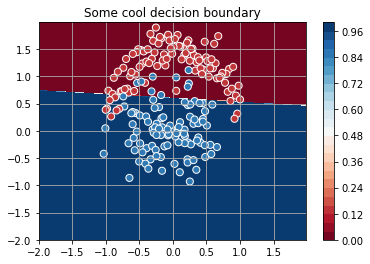

In [29]:
preds = predict(grid_arr)
plot_decision(preds)

### Feature space expansion

In [30]:
# meet theano's scan:
# allocate variable
i = T.lscalar("i")

# fn parameters: sequences (if any), prior result(s) (if needed), non-sequences (if any)
# the sequences argument is ommited in this example
result, updates = theano.scan(fn=lambda prior_result, i: prior_result * i,
                              # initialize the output
                              outputs_info=T.ones_like(i),
                              # pass input as non sequence
                              non_sequences=i,
                              # this many iterations
                              n_steps=3)

# compile the function
poly = theano.function(inputs=[i], 
                        outputs=result,
                        updates=updates, # actually safe to omit in this case
                        allow_input_downcast=True)
poly(5)

array([  5,  25, 125])

In [31]:
# meet theano's scan 2:
# allocate variable
I = T.lmatrix("I")

# fn parameters: sequences (if any), prior result(s) (if needed), non-sequences (if any)
# the sequences argument is ommited in this example
result, updates = theano.scan(fn=lambda prior_result, I: prior_result * I,
                              # initialize the output
                              outputs_info=T.ones_like(I),
                              # pass input as non sequence
                              non_sequences=I,
                              # this many iterations
                              n_steps=2)

# x  y  -> x  y  x^2  y^2
# x' y' -> x' y' x'^2 y'^2

output = result.dimshuffle(1, 0, 2).reshape((result.shape[1], 
                                             result.shape[0] * result.shape[2]))
# compile the function
poly = theano.function(inputs=[I], 
                        outputs=output,
                        updates=updates, # actually safe to omit in this case
                        allow_input_downcast=True)
output = poly((arange(6) + 1).reshape(3, 2))
output

array([[ 1,  2,  1,  4],
       [ 3,  4,  9, 16],
       [ 5,  6, 25, 36]])

More documentation on looping in Theano: http://deeplearning.net/software/theano/library/scan.html

In [32]:
# reset parameters
def poly(inp, degree=2):
  
    result, updates = theano.scan(fn=lambda prior_result, inp: prior_result * inp,
                                  # initialize the output
                                  outputs_info=T.ones_like(inp),
                                  # pass input as non sequence
                                  non_sequences=inp,
                                  # this many iterations
                                  n_steps=degree)
    return result.dimshuffle(1, 0, 2).reshape((result.shape[1], 
                                               result.shape[0] * result.shape[2]))

# reset parameters
W = theano.shared(
    value=numpy.zeros((8, 1),dtype=theano.config.floatX), 
    name='W',  
    borrow=True)

b = theano.shared(
    value=numpy.zeros((1,), dtype=theano.config.floatX),
    name='b',
    borrow=True)
# and define symbolic variables
X = T.matrix('X')
Y = T.imatrix('Y')

# define model
linear = T.dot(poly(X, degree=4), W) + b

# We only need to change the loss function
C = 100.
loss = C * T.maximum(0, 1 - linear * (Y * 2 - 1)).mean() + T.square(W).sum()

# compute the gradients
g_W = T.grad(loss, W)
g_b = T.grad(loss, b)

# define parametes updates
updates = [(W, W - 0.02 * g_W),
           (b, b - 0.04 * g_b)]

# compile functions
train = theano.function(
    inputs=[X, Y],
    outputs=loss,
    updates=updates,
    allow_input_downcast=True
)
               
predict = theano.function(
    [X],
    linear > 0,
    allow_input_downcast=True
)

In [33]:
for iter_ in range(1000):
    loss = train(x, y[:, np.newaxis])
    if iter_ % 50 == 0:
        print("[Iteration {:04d}] Train loss: {:.4f}".format(iter_, float(loss)))


[Iteration 0000] Train loss: 100.0000
[Iteration 0050] Train loss: 18.7497
[Iteration 0100] Train loss: 18.5055
[Iteration 0150] Train loss: 18.6455
[Iteration 0200] Train loss: 18.7830
[Iteration 0250] Train loss: 19.0886
[Iteration 0300] Train loss: 18.5076
[Iteration 0350] Train loss: 18.7901
[Iteration 0400] Train loss: 18.5527
[Iteration 0450] Train loss: 18.6981
[Iteration 0500] Train loss: 19.0408
[Iteration 0550] Train loss: 18.9144
[Iteration 0600] Train loss: 18.5164
[Iteration 0650] Train loss: 18.3586
[Iteration 0700] Train loss: 18.5727
[Iteration 0750] Train loss: 18.7815
[Iteration 0800] Train loss: 18.8476
[Iteration 0850] Train loss: 18.4086
[Iteration 0900] Train loss: 18.4568
[Iteration 0950] Train loss: 19.0837


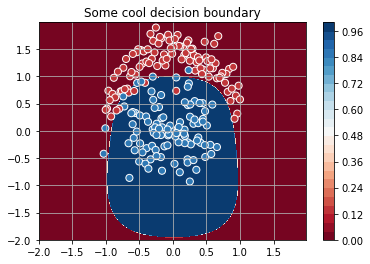

In [34]:
preds = predict(grid_arr)
plot_decision(preds)

### Regularization

In [35]:
# reset parameters
def poly(inp, degree=2):
  
    result, updates = theano.scan(fn=lambda prior_result, inp: prior_result * inp,
                                  # initialize the output
                                  outputs_info=T.ones_like(inp),
                                  # pass input as non sequence
                                  non_sequences=inp,
                                  # this many iterations
                                  n_steps=degree)
    return result.dimshuffle(1, 0, 2).reshape((result.shape[1], 
                                               result.shape[0] * result.shape[2]))

# reset parameters
W = theano.shared(
    value=numpy.zeros((30, 1),dtype=theano.config.floatX), 
    name='W',  
    borrow=True)

b = theano.shared(
    value=numpy.zeros((1,), dtype=theano.config.floatX),
    name='b',
    borrow=True)
# and define symbolic variables
X = T.matrix('X')
Y = T.imatrix('Y')

# define model
linear = T.dot(poly(X, degree=15), W) + b

# We only need to change the loss function
C = 100.
loss = C * T.maximum(0, 1 - linear * (Y * 2 - 1)).mean() + T.abs_(W).sum()

# compute the gradients
g_W = T.grad(loss, W)
g_b = T.grad(loss, b)

# define parametes updates
updates = [(W, W - 0.02 * g_W),
           (b, b - 0.04 * g_b)]

# compile functions
train = theano.function(
    inputs=[X, Y],
    outputs=loss,
    updates=updates,
    allow_input_downcast=True
)
               
predict = theano.function(
    [X],
    linear > 0,
    allow_input_downcast=True
)

In [36]:
for iter_ in range(10000):
    loss = train(x, y[:, np.newaxis])
    if iter_ % 1000 == 0:
        print("[Iteration {:04d}] Train loss: {:.4f}".format(iter_, float(loss)))

[Iteration 0000] Train loss: 100.0000
[Iteration 1000] Train loss: 4141.9360
[Iteration 2000] Train loss: 2653.1710
[Iteration 3000] Train loss: 1691.7192
[Iteration 4000] Train loss: 1120.5610
[Iteration 5000] Train loss: 751.1549
[Iteration 6000] Train loss: 551.9124
[Iteration 7000] Train loss: 381.6870
[Iteration 8000] Train loss: 236.2400
[Iteration 9000] Train loss: 114.8060


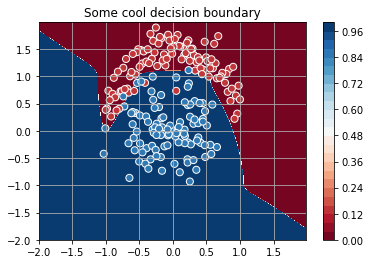

In [37]:
preds = predict(grid_arr)
plot_decision(preds)

## Lasagne

Lasagne is a lightweight library to build and train neural networks in Theano:

https://github.com/Lasagne/Lasagne

In [38]:
import lasagne
from lasagne.utils import floatX

import gzip
import time

In [39]:
!wget -P data http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget -P data  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz

--2017-03-16 00:15:37--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9,5M) [application/x-gzip]
Saving to: ‘data/train-images-idx3-ubyte.gz.7’

train-images-idx3-u 100%[===================>]   9,45M   367KB/s    in 21s     

2017-03-16 00:15:58 (472 KB/s) - ‘data/train-images-idx3-ubyte.gz.7’ saved [9912422/9912422]

--2017-03-16 00:15:58--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 216.165.22.6
Connecting to yann.lecun.com (yann.lecun.com)|216.165.22.6|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘data/train-labels-idx1-ubyte.gz.7’

train-labels-idx1-u 100%[===================>]  28,20K  --.-KB/s    in 0,1s    

2017-03-16 00:15:58 (205 KB/s

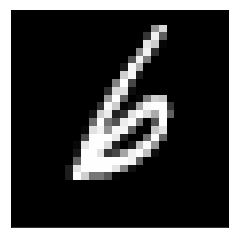

In [40]:
# the following code has been mostly adopted from https://github.com/Lasagne/Lasagne/blob/master/examples/mnist.py
# you are encouraged to go through the example there or have a look at a more in-depth tutorial: 
# http://lasagne.readthedocs.org/en/latest/user/tutorial.html

def plot_mnist_sample(sample):
    imshow(sample[0], cmap=cm.Greys_r)
    xticks([])
    yticks([])

with gzip.open("data/train-images-idx3-ubyte.gz", 'rb') as f:
    X = frombuffer(f.read(), uint8, offset=16).reshape(-1, 1, 28, 28)
    X = X / floatX(256)
    
with gzip.open("data/train-labels-idx1-ubyte.gz", 'rb') as f:
    y = frombuffer(f.read(), uint8, offset=8)
    
X_train, X_val = X[:-10000], X[-10000:]
y_train, y_val = y[:-10000], y[-10000:]

plot_mnist_sample(X_train[randint(0, 10000)])

### Defining the network

In [41]:
def build_mlp(input_var=None):
    # This creates an MLP of two hidden layers of 800 units each, followed by
    # a softmax output layer of 10 units. It applies 20% dropout to the input
    # data and 50% dropout to the hidden layers.

    # Input layer, specifying the expected input shape of the network
    # (unspecified batchsize, 1 channel, 28 rows and 28 columns) and
    # linking it to the given Theano variable `input_var`, if any:
    network = lasagne.layers.InputLayer(
        shape=(None, 1, 28, 28),
        input_var=input_var)
    
    # Apply 20% dropout to the input data:
    network = lasagne.layers.DropoutLayer(network, p=0.2)

    # Add a fully-connected layer of 800 units, using the linear rectifier, and
    # initializing weights with Glorot's scheme (which is the default anyway):
    network = lasagne.layers.DenseLayer(
        network, 
        num_units=800,
        nonlinearity=lasagne.nonlinearities.rectify,
        W=lasagne.init.GlorotUniform())

    # We'll now add dropout of 50%:
    network = lasagne.layers.DropoutLayer(network, p=0.5)

    # Another 800-unit layer:
    network = lasagne.layers.DenseLayer(
        network,
        num_units=800,
        nonlinearity=lasagne.nonlinearities.rectify)

    # 50% dropout again:
    network = lasagne.layers.DropoutLayer(network, p=0.5)

    # Finally, we'll add the fully-connected output layer, of 10 softmax units:
    network = lasagne.layers.DenseLayer(
        network,
        num_units=10,
        nonlinearity=lasagne.nonlinearities.softmax)

    return network


def build_cnn(input_var=None):
    # As a third model, we'll create a CNN of two convolution + pooling stages
    # and a fully-connected hidden layer in front of the output layer.
    
    # Input layer, as usual:
    network = lasagne.layers.InputLayer(shape=(None, 1, 28, 28),
                                        input_var=input_var)
    # This time we do not apply input dropout, as it tends to work less well
    # for convolutional layers.

    # Convolutional layer with 32 kernels of size 5x5. Strided and padded
    # convolutions are supported as well; see the docstring.
    network = lasagne.layers.Conv2DLayer(
        network, 
        num_filters=32,
        filter_size=(5, 5),
        nonlinearity=lasagne.nonlinearities.rectify,
        W=lasagne.init.GlorotUniform())
    
    # Expert note: Lasagne provides alternative convolutional layers that
    # override Theano's choice of which implementation to use; for details
    # please see http://lasagne.readthedocs.org/en/latest/user/tutorial.html.

    # Max-pooling layer of factor 2 in both dimensions:
    network = lasagne.layers.MaxPool2DLayer(network, pool_size=(2, 2))

    # Another convolution with 32 5x5 kernels, and another 2x2 pooling:
    network = lasagne.layers.Conv2DLayer(
        network,
        num_filters=32,
        filter_size=(5, 5),
        nonlinearity=lasagne.nonlinearities.rectify)
    network = lasagne.layers.MaxPool2DLayer(network, pool_size=(2, 2))

    # A fully-connected layer of 256 units with 50% dropout on its inputs:
    network = lasagne.layers.DenseLayer(
            lasagne.layers.dropout(network, p=.5),
            num_units=256,
            nonlinearity=lasagne.nonlinearities.rectify)

    # And, finally, the 10-unit output layer with 50% dropout on its inputs:
    network = lasagne.layers.DenseLayer(
            lasagne.layers.dropout(network, p=.5),
            num_units=10,
            nonlinearity=lasagne.nonlinearities.softmax)

    return network

def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = arange(len(inputs))
        random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

### Setting things up

In [42]:
input_var = T.tensor4('inputs')
target_var = T.ivector('targets')

# choose MLP or CNN
network = build_mlp(input_var)
#network = build_cnn(input_var)

prediction = lasagne.layers.get_output(network)
loss = lasagne.objectives.categorical_crossentropy(prediction, target_var)
loss = loss.mean()
# We could add some weight decay as well here, see lasagne.regularization.

# Create update expressions for training, i.e., how to modify the
# parameters at each training step. Here, we'll use Stochastic Gradient
# Descent (SGD) with Nesterov momentum, but Lasagne offers plenty more.
params = lasagne.layers.get_all_params(network, trainable=True)
updates = lasagne.updates.nesterov_momentum(
    loss, 
    params, 
    learning_rate=0.01, 
    momentum=0.9)

# Create a loss expression for validation/testing. The crucial difference
# here is that we do a deterministic forward pass through the network,
# disabling dropout layers.
test_prediction = lasagne.layers.get_output(network, deterministic=True)
test_loss = T.nnet.categorical_crossentropy(test_prediction,
                                                        target_var)
test_loss = test_loss.mean()
# As a bonus, also create an expression for the classification accuracy:
test_acc = T.mean(
    T.eq(T.argmax(test_prediction, axis=1), target_var),
    dtype=theano.config.floatX)

train = theano.function(
    inputs=[input_var, target_var],
    outputs=loss,
    updates=updates)

# Compile a second function computing the validation loss and accuracy:
validate = theano.function(
    inputs=[input_var, target_var],
    outputs=[test_loss, test_acc])


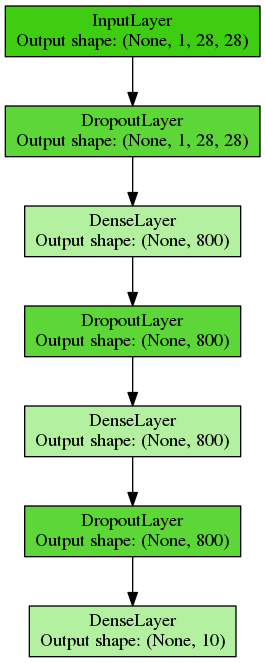

In [43]:
draw_to_notebook(lasagne.layers.get_all_layers(network))

### Training

In [44]:
print("| Epoch | Train err | Validation err | Accuracy |  Time  |")
print("|------------------------------------------------------------------------|")
train_loss = []
valid_loss = []
valid_acc = []
try:
    for epoch in range(100):
            # In each epoch, we do a full pass over the training data:
            train_err = 0
            train_batches = 0
            start_time = time.time()
            for batch in iterate_minibatches(X_train, y_train, 500, shuffle=True):
                inputs, targets = batch
                train_err += train(inputs, targets)
                train_batches += 1

            # And a full pass over the validation data:
            val_err = 0
            val_acc = 0
            val_batches = 0
            for batch in iterate_minibatches(X_val, y_val, 500, shuffle=False):
                inputs, targets = batch
                err, acc = validate(inputs, targets)
                val_err += err
                val_acc += acc
                val_batches += 1

            print("|{:05d} | {:4.5f} | {:16.5f} | {:10.2f} | {:7.2f} |".format
                  (epoch,
                    train_err / train_batches,
                    val_err / val_batches,
                    val_acc / val_batches * 100,
                    time.time() - start_time))
            train_loss.append(train_err / train_batches)
            valid_loss.append(val_err / val_batches)
            valid_acc.append(val_acc / val_batches * 100)
except KeyboardInterrupt:
    print("The training was interrupted on epoch: {}".format(epoch))

| Epoch | Train err | Validation err | Accuracy |  Time  |
|------------------------------------------------------------------------|
|00000 | 1.23364 |          0.40755 |      88.83 |    0.26 |
|00001 | 0.57116 |          0.30780 |      91.13 |    0.25 |
|00002 | 0.46871 |          0.26442 |      92.34 |    0.25 |
|00003 | 0.41025 |          0.23602 |      93.11 |    0.24 |
|00004 | 0.37213 |          0.21262 |      93.84 |    0.26 |
|00005 | 0.34078 |          0.19527 |      94.26 |    0.25 |
|00006 | 0.31696 |          0.18025 |      94.74 |    0.24 |
|00007 | 0.29529 |          0.16847 |      95.12 |    0.26 |
|00008 | 0.28147 |          0.15793 |      95.39 |    0.27 |
|00009 | 0.26698 |          0.15140 |      95.60 |    0.25 |
|00010 | 0.25478 |          0.14150 |      95.93 |    0.25 |
|00011 | 0.24320 |          0.13679 |      96.04 |    0.25 |
|00012 | 0.23134 |          0.12837 |      96.27 |    0.25 |
|00013 | 0.22500 |          0.12398 |      96.45 |    0.26 |
|00014 | 0.2

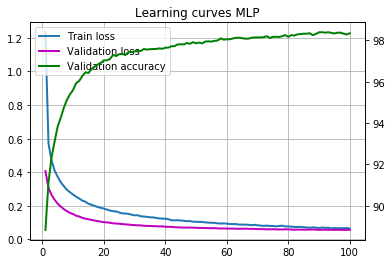

In [45]:
plot_learning_curves(train_loss, valid_loss, val_acc)

### Goodies

#### Saving your network

In [46]:
# save the weights
savez('model.npz', *lasagne.layers.get_all_param_values(network))

network = build_mlp()
# And load them again later on like this:
with np.load('model.npz') as f:
     param_values = [f['arr_%d' % i] for i in range(len(f.files))]
lasagne.layers.set_all_param_values(network, param_values)


#### Getting predictions out

In [47]:
# build the expression
predictions = T.argmax(test_prediction, axis=1)

# define the prediction function
predict = theano.function(
    inputs=[input_var],
    outputs=predictions)

# get just one batch for simplicity
inputs, targets = next(iterate_minibatches(X_val, y_val, 500, shuffle=False))
preds = predict(inputs)
bad_samples = where(preds != targets)[0]


Predicted: 9 True: 3


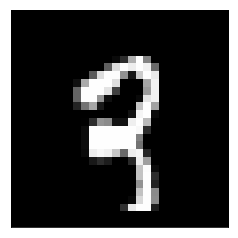

In [48]:
error = random.choice(bad_samples)
plot_mnist_sample(X_val[error])
print("Predicted: %d True: %d" % (preds[error], targets[error]))

A lot of interesting stuff here: https://github.com/Lasagne/Recipes